In [37]:
# import OpenCV library
import cv2
# import numpy
import numpy as np # an open source numerial Python library   
from matplotlib import pyplot as plt # to display images, plot graphs, ...

from myutils import *

In [38]:
# replace the filenames with yours
img1 = cv2.cvtColor(cv2.imread('Picture1.jpg'), cv2.COLOR_BGR2GRAY)
corners1, V1 = DetectFASTCorner(img1, 20)
desc1 = ExtractDescriptors(img1, corners1)
print(corners1.shape)

img2 = cv2.cvtColor(cv2.imread('Picture2.jpg'), cv2.COLOR_BGR2GRAY)
corners2, V2 = DetectFASTCorner(img2, 20)
desc2 = ExtractDescriptors(img2, corners2)
print(corners2.shape)

img3 = cv2.cvtColor(cv2.imread('Picture3.jpg'), cv2.COLOR_BGR2GRAY)
corners3, V3 = DetectFASTCorner(img3, 20)
desc3 = ExtractDescriptors(img3, corners3)
print(corners3.shape)

img4 = cv2.cvtColor(cv2.imread('Picture4.jpg'), cv2.COLOR_BGR2GRAY)
corners4, V4 = DetectFASTCorner(img4, 20)
desc4 = ExtractDescriptors(img4, corners4)
print(corners4.shape)

img5 = cv2.cvtColor(cv2.imread('Picture5.jpg'), cv2.COLOR_BGR2GRAY)
corners5, V5 = DetectFASTCorner(img5, 20)
desc5 = ExtractDescriptors(img5, corners5)
print(corners5.shape)

(120, 2)
(131, 2)
(321, 2)
(552, 2)
(273, 2)


In [39]:
## Tutorial 

print("Let's try some functions of numpy library.\n")
A = np.array(range(16)).reshape((4,4))

print("This is a numpy array, A:")
print(A)

print("\nThe function np.sum(A) computes summation of all the elements of A")
print(np.sum(A))

print("\nnp.sum(A, axis=0) computes summation of elements for each column")
print(np.sum(A, axis=0))

print("\nnp.sum(A, axis=1) computes summation of elements for each row")
print(np.sum(A, axis=1))

B = (abs(A - 8)+1).reshape((1, 16))[0]
print("\nThis is a numpy array B:")
print(B)
print("\nnp.amin(B) returns the minimum value of the matrix B" )
print(np.amin(B))

print("\nnp.where(B == np.amin(B)) returns the index of the minimum value of B")
print(np.where(B == np.amin(B)))
print("\nIf there are more than one indices, the function retures them all.")
print("For example, a matrix C:")
C = abs(B - 6)
print(C)
print("\nnp.where(C == np.amin(C)) returns the index 3 and 13.")
print(np.where(C == np.amin(C)))

print("\nTreat the result as an array if you want to get one of them:")
print("\nnp.where(C == np.amin(C))[0][0] will give you the first one.")
print(np.where(C == np.amin(C))[0][0])

print("\n If we want to add more rows to an existing nummpy array, use np.vstack()")
print("Here is an example:")
print("Let's creat an empty numpy array: np.empty(0).reshape((0,2))")
D = np.empty(0).reshape((0,2))
print(D)

print("Then, add rows to the array by typing: D = np.vstact( (D, [7, 10]) )")
D = np.vstack((D, [7, 10])) 
print(D)
print("Note that the array D and the new row [7, 10] are elements of a tuple (D, [7, 10])")
print("Let's add another row: np.vstack( (D, [2, 3]) )")
D = np.vstack((D, [2, 3]))
print(D)

E = np.array(range(9)).reshape((3,3))
F = np.array(range(12)).reshape((3,4))
print(np.matmul(E, F))



Let's try some functions of numpy library.

This is a numpy array, A:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

The function np.sum(A) computes summation of all the elements of A
120

np.sum(A, axis=0) computes summation of elements for each column
[24 28 32 36]

np.sum(A, axis=1) computes summation of elements for each row
[ 6 22 38 54]

This is a numpy array B:
[9 8 7 6 5 4 3 2 1 2 3 4 5 6 7 8]

np.amin(B) returns the minimum value of the matrix B
1

np.where(B == np.amin(B)) returns the index of the minimum value of B
(array([8]),)

If there are more than one indices, the function retures them all.
For example, a matrix C:
[3 2 1 0 1 2 3 4 5 4 3 2 1 0 1 2]

np.where(C == np.amin(C)) returns the index 3 and 13.
(array([ 3, 13]),)

Treat the result as an array if you want to get one of them:

np.where(C == np.amin(C))[0][0] will give you the first one.
3

 If we want to add more rows to an existing nummpy array, use np.vstack()
Here is an example:
Let's creat an em

In [40]:
# Implement three approaches to improve the quality of correspondences
def MatchingTwoImages(corner_src, desc_src, corner_dst, desc_dst):
    
    max_dist = 48
    n = corner_src.shape[0]
    m = corner_dst.shape[0]

    corr = np.empty(0).reshape((0, 2)).astype(int)
    
    # correspndences search (img1 to img2)
    for i in range(n):
        
        # desc_src[i,:] is the descriptor of i_th point of image 1
        # abs(desc_dst - desc_src) : absolute difference of i_th descriptor of image1 and every descriptor of image 2
        # np.sum(some_array, axis=1 ): if some_array is 2D, this function call with axis=1 computes sum for each row. 
        dist = np.sum(abs(desc_dst - desc_src[i, :]), axis=1)
        
        # now the minimum of 'dist' and the corresponding index j is the best match
        min_idx = np.where(dist == np.amin(dist))[0][0]
        min_val = dist[min_idx]
        
        # We can get the second smallest value and index
        dist[min_idx] = 48
        min_idx2 = np.where(dist == np.amin(dist))[0][0]
        min_val2 = dist[min_idx2]
        
        b_accept = True 
        # Implement 3 tests
        # 1. Thresholding matching cost(distance)
        if min_val > 0:
            b_accept = False
        
        ## 2. Ratio test
        threshold = 0.3
        if min_val2 != 0:
            if min_val/min_val2 > threshold:
                b_accept = False

        # 3. Symmetry test
        sym_dist = np.sum(abs(desc_src - desc_dst[min_idx, :]), axis=1) 
        sym_idx = np.where(sym_dist == np.amin(sym_dist))[0][0]
        if sym_idx != i:
            b_accept = False
        
        heightThreshold = 200
        if(abs(corner_src[i, 1] - corner_dst[min_idx, 1]) > heightThreshold ):
          b_accept = False
        
        ## if the correspondence (i, min_idx) passes three tests
        if b_accept:
            corr = np.vstack((corr, [i, min_idx]))
        
    
    
    return corr

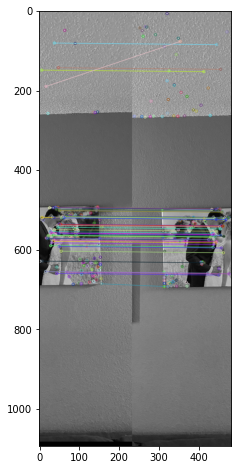

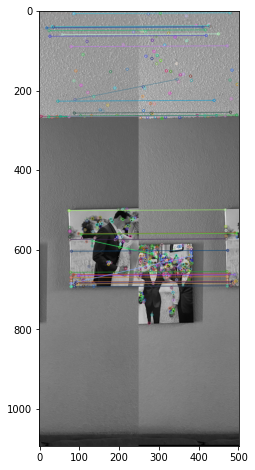

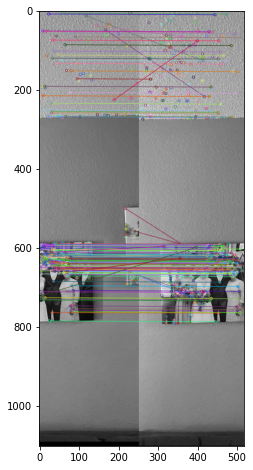

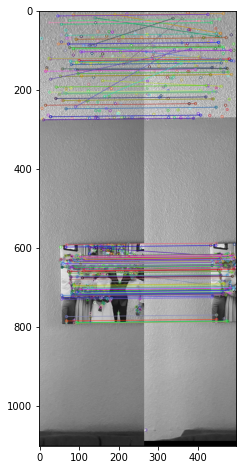

In [41]:
## Run this cell to visualize the correspondences 

corr1to2 = MatchingTwoImages(corners1, desc1, corners2, desc2)

# visualize the correspondences 
res_img = DrawCorrespondences(corr1to2, img1, corners1, img2, corners2)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

corr2to3 = MatchingTwoImages(corners2, desc2, corners3, desc3)

# visualize the correspondences 
res_img = DrawCorrespondences(corr2to3, img2, corners2, img3, corners3)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

corr3to4 = MatchingTwoImages(corners3, desc3, corners4, desc4)

# visualize the correspondences 
res_img = DrawCorrespondences(corr3to4, img3, corners3, img4, corners4)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

corr4to5 = MatchingTwoImages(corners4, desc4, corners5, desc5)

# visualize the correspondences 
res_img = DrawCorrespondences(corr4to5, img4, corners4, img5, corners5)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

In [42]:
# Use np.random.permutation to random
print("\nnp.random.permutation(10) returns random permutation of 0, 1, 2, ..., 9:")
rnd_perm_list = np.random.permutation(10)
print(rnd_perm_list)

print("\nIf you want the first 3 from the list:")
first_three_elements = rnd_perm_list[0:3]
print(first_three_elements)

# get rows using indices of rows
A = np.array([[4.0,5.0], [3,6], [2,7], [6,6], [8,2]])
print("\nAn array A consists of two columns and many rows")
print(A)

print("\nWe can get 3 random rows using the following code")
idx_perm = np.random.permutation(A.shape[0])[0:3]
print(idx_perm)
print(A[idx_perm,:])

print("\nTranspose of A is:")
print(A.T)
print("\nAn array with all ones:")
print(np.ones((1,A.shape[0])))
print("\nAdd an additional row to the transpose of A:")
print(np.vstack((A.T, np.ones((1,A.shape[0])) )))

print("\nLet's divide an array using broadcasting:")
print("\nThis is an array B:")
B = A.T
print(B)
print("\nThis is an array C:")
C = np.array([2, 2, 2, 1, 1.0])
print(C)

print("\nWe can divide two rows of B by C, at the same time:")
print(np.divide(B, C))

np.eye(3)



np.random.permutation(10) returns random permutation of 0, 1, 2, ..., 9:
[0 8 1 6 3 7 9 4 5 2]

If you want the first 3 from the list:
[0 8 1]

An array A consists of two columns and many rows
[[4. 5.]
 [3. 6.]
 [2. 7.]
 [6. 6.]
 [8. 2.]]

We can get 3 random rows using the following code
[0 3 2]
[[4. 5.]
 [6. 6.]
 [2. 7.]]

Transpose of A is:
[[4. 3. 2. 6. 8.]
 [5. 6. 7. 6. 2.]]

An array with all ones:
[[1. 1. 1. 1. 1.]]

Add an additional row to the transpose of A:
[[4. 3. 2. 6. 8.]
 [5. 6. 7. 6. 2.]
 [1. 1. 1. 1. 1.]]

Let's divide an array using broadcasting:

This is an array B:
[[4. 3. 2. 6. 8.]
 [5. 6. 7. 6. 2.]]

This is an array C:
[2. 2. 2. 1. 1.]

We can divide two rows of B by C, at the same time:
[[2.  1.5 1.  6.  8. ]
 [2.5 3.  3.5 6.  2. ]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
def HomographyRANSAC(corr, corners_src, corners_dst, max_iter):
    # corners_src: n by 2 numpy array, column 0: x, column 1: y 
    # corners_dst: n by 2 numpy array 
    # corr: m by 2 numpy array, a list of correspondences, column 0: index of pixels in corners_src, column 1: index of pixels in corner_dst
    
    # max_iter: maximum iteration
    
    # Algorithm: 
    # 1. Randomly select 4 points
    # 2. Compute Homography matrix
    # 3. Count inliers
    # -  if the current H is better than the best one so far, replace the best H and keep the # of inliers
    # 4. Repeat 1 - 3
    
    n = corr.shape[0]
    
    best_H = np.eye(3)    # best Homography matrix
    best_inlier_count = 0
    max_inlier = 5 # maximum inlier count
    
    for i in range(max_iter):
        ## Randomly select 4 points: select index first
        ## idx_src = # 4 random indices 
        ## get 4 random rows of corners_src and corners_dst using 'idx_src'
        idx_src = np.random.permutation(n)[0:4]
        idx_src = corr[idx_src,:]
        rows_src = corners_src[idx_src[:,0],:]
        rows_dst = corners_dst[idx_src[:,1],:]

        ## Estimate Homograph: use the function 'FindHomography(pts1, pts2)'
        ## pts1 is the selected 4 rows from 'corners_src' and consists of two columns for x and y
        ## pts2 is 4 rows of the same index from 'corners_dst'
        H = FindHomography(rows_src, rows_dst)

        H = np.reshape(H, (3, 3))
        # rows_src = np.vstack((rows_src.T, np.ones((1, rows_src.shape[0]))))
        corners_src_T = np.vstack((corners_src.T, np.ones((1,corners_src.shape[0])) ))
        u, v, w = np.matmul(H, corners_src_T)
        corners_p = np.array([u/w, v/w]).T
        
        ## Count inliers 
        inlier_count = 0
        for r in range(n):
        
            ## Use 'np.matmul' to multiply H matrix with corners_src points 
            ## Note that we need transpose of 'corners_src' and add another row with all ones
            ## See the example below and the previous cell.
            ## e.g. x1, x2, x3, x4, x5, ....
            ##      y1, y2, y3, y4, y5, ....
            ##       1,  1,  1,  1,  1, ....
            ## The result of multiplication is the transpose of [u, v, w].
            ## We can get transformed x and y coordinates by dividing u and v with w. (See the previous section.)
            # corners_p = [x, y]
            # corners_dst = [x', y']
            x  = corr[r,:]
            distance = np.linalg.norm(corners_p[x[0],:] - corners_dst[x[1],:])
        
            ## Once you get the transformed points, 
            ## measure the distance between the transformed point and the corresponding corner_dst
            ## If the distance (Euclidean distance) is less then a threshold (e.g. 5~8 pixels?), count it as inlier
            if distance < max_inlier:
                inlier_count = inlier_count + 1
            
            
        ## If the current inlier-count is greater than 'max_inlier',
        ##    replace 'best_H' with the current 'H', and assign current inlier-count to 'max_inlier'
        if inlier_count > best_inlier_count:
            best_H = H
            best_inlier_count = inlier_count
        
    return best_H, best_inlier_count
    
    
    

In [44]:
## Use the implemented HomographyRANSAC to compute H12, H23, H34, H45
max_iter = 2000

# e.g. 
H12, inlier_count12 = HomographyRANSAC(corr1to2, corners1, corners2, max_iter)
H23, inlier_count23 = HomographyRANSAC(corr2to3, corners2, corners3, max_iter)
H34, inlier_count34 = HomographyRANSAC(corr3to4, corners3, corners4, max_iter)
H45, inlier_count45 = HomographyRANSAC(corr4to5, corners4, corners5, max_iter)
np.ones([1,100])


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

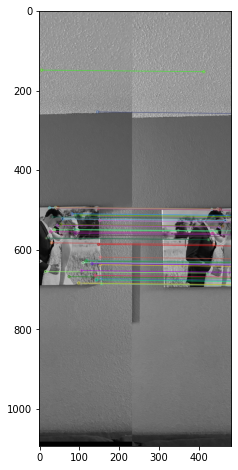

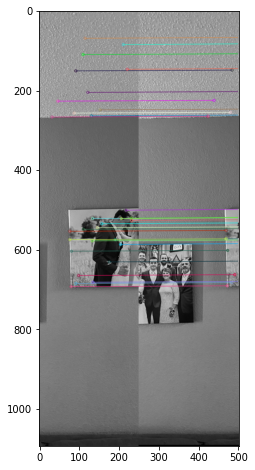

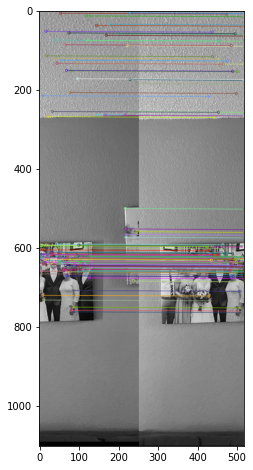

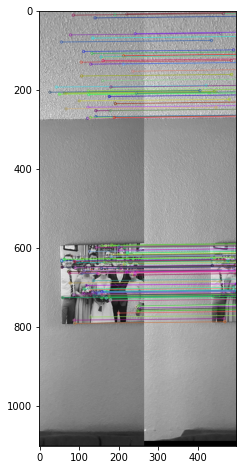

In [45]:
## Visualize the correspondence based on the Homography: 
## replace the following variables 
img_src = img1
img_dst = img2
corners_src = corners1
corners_dst = corners2
H = H12
N = inlier_count12 # how many points do you want to draw? Choose a number based on the # of correspondences you have

## You don't need to modify the code below this line
idx_rnd = np.random.permutation(corners_src.shape[0])[0:N] # select N random indices
sel_corners = corners_src[idx_rnd, :];
uvw = np.matmul(H, np.vstack((sel_corners.T, np.ones([1, N]))))
corners_p = np.divide(uvw[0:2,:], uvw[-1,:])

corr = np.repeat(np.array(range(N)), 2).reshape(N, 2)
res_img = DrawCorrespondences(corr, img_src, sel_corners, img_dst, corners_p.T)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

## replace the following variables 
img_src = img2
img_dst = img3
corners_src = corners2
corners_dst = corners3
H = H23
N = inlier_count23 # how many points do you want to draw? Choose a number based on the # of correspondences you have

## You don't need to modify the code below this line
idx_rnd = np.random.permutation(corners_src.shape[0])[0:N] # select N random indices
sel_corners = corners_src[idx_rnd, :];
uvw = np.matmul(H, np.vstack((sel_corners.T, np.ones([1, N]))))
corners_p = np.divide(uvw[0:2,:], uvw[-1,:])

corr = np.repeat(np.array(range(N)), 2).reshape(N, 2)
res_img = DrawCorrespondences(corr, img_src, sel_corners, img_dst, corners_p.T)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()


## replace the following variables 
img_src = img3
img_dst = img4
corners_src = corners3
corners_dst = corners4
H = H34
N = inlier_count34 # how many points do you want to draw? Choose a number based on the # of correspondences you have

## You don't need to modify the code below this line
idx_rnd = np.random.permutation(corners_src.shape[0])[0:N] # select N random indices
sel_corners = corners_src[idx_rnd, :];
uvw = np.matmul(H, np.vstack((sel_corners.T, np.ones([1, N]))))
corners_p = np.divide(uvw[0:2,:], uvw[-1,:])

corr = np.repeat(np.array(range(N)), 2).reshape(N, 2)
res_img = DrawCorrespondences(corr, img_src, sel_corners, img_dst, corners_p.T)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()


## replace the following variables 
img_src = img4
img_dst = img5
corners_src = corners4
corners_dst = corners5
H = H45
N = inlier_count45 # how many points do you want to draw? Choose a number based on the # of correspondences you have

## You don't need to modify the code below this line
idx_rnd = np.random.permutation(corners_src.shape[0])[0:N] # select N random indices
sel_corners = corners_src[idx_rnd, :];
uvw = np.matmul(H, np.vstack((sel_corners.T, np.ones([1, N]))))
corners_p = np.divide(uvw[0:2,:], uvw[-1,:])

corr = np.repeat(np.array(range(N)), 2).reshape(N, 2)
res_img = DrawCorrespondences(corr, img_src, sel_corners, img_dst, corners_p.T)

plt.figure(figsize=(12,8)) # if the image is too small, try "figsize=(14, 10)"
plt.imshow(res_img)    
plt.show()

In [46]:
## Compute H13, H23, H43, H53 (image 3 is the reference)

## Use np.matmul() to multiply two matrics
## e.g. np.matmul(H12, H23) # multiplies H12 and H23

## Use np.linalg.inv(H12) to get an inverse of H12
## e.g. H21 = np.linalg.inv(H12)
    
## Modify the following 4 lines.
# H13 = np.matmul(H12, H23)
H13 = np.matmul(H23, H12)
# H23 = np.eye(3) + np.array([[0, 0, -100.0], [0, 0, -100.0], [0, 0, 0]])
H43 = np.linalg.inv(H34)
H35 = np.matmul(H34, H45)
# H35 = np.matmul(H45, H34)
H53 = np.linalg.inv(H35)
    

In [47]:
# Warping 
# First, let's compute the size of output image. 

h, w = img3.shape[0:2]
four_corners = np.array([[0.0, 0.0, 1.0], [w-1, 0.0, 1.0], [w-1, h-1, 1], [0, h-1, 1]])
print(four_corners.T)


## get transformed points 
pts_in_ref_img = np.zeros(0).reshape(0, 2)

# 4 corners of image1 in the reference coordinate
uvw = np.matmul(H13, four_corners.T)
pts_in_ref_img13 = np.divide(uvw[0:2,:], uvw[-1,:])
pts_in_ref_img = np.vstack((pts_in_ref_img, pts_in_ref_img13.T))

# 4 corners of image2 in the reference coordinate
uvw = np.matmul(H23, four_corners.T)
pts_in_ref_img23 = np.divide(uvw[0:2,:], uvw[-1,:])
pts_in_ref_img = np.vstack((pts_in_ref_img, pts_in_ref_img23.T))

# 4 corners of image3
pts_in_ref_img = np.vstack((pts_in_ref_img, four_corners[:,0:2]))

# 4 corners of image4 in the reference coordinate
uvw = np.matmul(H43, four_corners.T)
pts_in_ref_img43 = np.divide(uvw[0:2,:], uvw[-1,:])
pts_in_ref_img = np.vstack((pts_in_ref_img, pts_in_ref_img43.T))

# 4 corners of image5 in the reference coordinate
uvw = np.matmul(H53, four_corners.T)
pts_in_ref_img53 = np.divide(uvw[0:2,:], uvw[-1,:])
pts_in_ref_img = np.vstack((pts_in_ref_img, pts_in_ref_img53.T))

print("\nThe transformed corner points in the reference coordinate:")
print(pts_in_ref_img)

## Find the left-top/right-bottom corners of the output image in the reference coordinate

## You can use 'np.amin(pts_in_ref_img[:,0])' to get the minimum 
min_x = np.floor(np.amin(pts_in_ref_img[:,0]))
min_y = np.floor(np.amin(pts_in_ref_img[:,1]))

## Use np.amax() instead, to get the maximum x and y values in the array
max_x = np.ceil(np.amax(pts_in_ref_img[:,0]))
max_y = np.ceil(np.amax(pts_in_ref_img[:,1]))

## Now, (min_x, min_y) is the left-top corner of the output image
## and (max_x, max_y) is the right-bottom corner of the output image
## What would be the width and height of the image? 

width = (max_x - min_x + 1).astype(int) 
height = (max_y - min_y + 1).astype(int)

print(width,height)

## Create new image 
result_img = np.zeros((height, width), dtype=int)

## result_img coordinates = reference_img coordinate + offset 
offset =  - np.array([min_x, min_y])
print(offset)

[[0.000e+00 2.510e+02 2.510e+02 0.000e+00]
 [0.000e+00 0.000e+00 1.089e+03 1.089e+03]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00]]

The transformed corner points in the reference coordinate:
[[ 315.00000001    1.99999962]
 [ 566.00000035    1.99999956]
 [ 566.00000006 1090.99999998]
 [ 315.00000003 1090.99999979]
 [ 142.           -2.        ]
 [ 393.00000009   -2.00000018]
 [ 393.00000004 1087.00000016]
 [ 142.00000001 1086.99999983]
 [   0.            0.        ]
 [ 251.            0.        ]
 [ 251.         1089.        ]
 [   0.         1089.        ]
 [-167.00000001   -2.        ]
 [  84.           -2.        ]
 [  84.         1086.99999997]
 [-167.         1087.00000003]
 [-280.00000001    2.        ]
 [ -29.            2.        ]
 [ -29.         1090.99999997]
 [-280.         1091.00000003]]
849 1096
[281.   3.]


[[-281. -280. -279. ...  565.  566.  567.]
 [  -3.   -3.   -3. ... 1092. 1092. 1092.]]
[[-2.810e+02 -2.800e+02 -2.790e+02 ...  5.650e+02  5.660e+02  5.670e+02]
 [-3.000e+00 -3.000e+00 -3.000e+00 ...  1.092e+03  1.092e+03  1.092e+03]
 [ 1.000e+00  1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00  1.000e+00]]


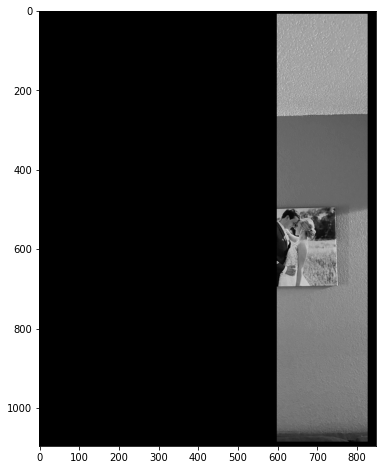

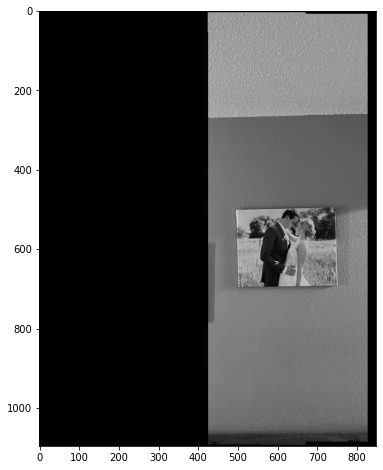

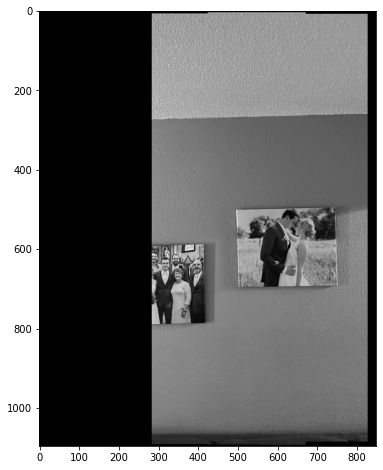

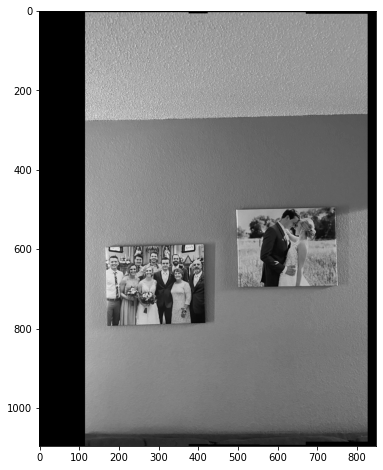

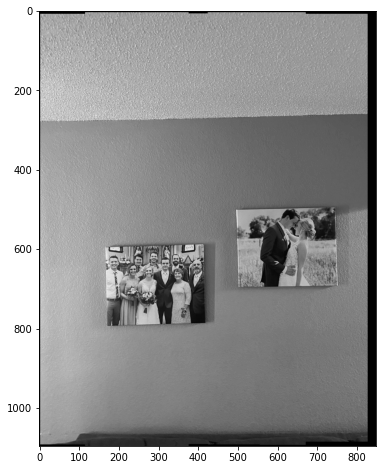

In [48]:
# All pixels of the result_img (output)
xx, yy = np.meshgrid(range(width),range(height))
all_pixels = np.vstack((xx.reshape(1,-1), yy.reshape(1,-1)))
all_pixels_ref = all_pixels - offset.reshape(2,1)
print(all_pixels_ref)
all_pixels_ref_1 = np.vstack((all_pixels_ref, np.ones((1, height*width))))
print(all_pixels_ref_1)



## Warping: Repeat the code (Step1 and 2) for Image2, 3, 4, and 5 (replace the transform matrix and image)
## Step1: Transform all pixels of the output image back to Image1 (using inv(H13)) 
uvw = np.matmul(np.linalg.inv(H13), all_pixels_ref_1)
xy_1 = np.divide(uvw[0:2,:], uvw[2,:]) # transformed pixels

# not all pixels are in Image1
b_valid = np.logical_and(xy_1[0,:] < img1.shape[1]-2, xy_1[0,:] > 2 )
b_valid = np.logical_and(b_valid, np.logical_and(xy_1[1,:] < img1.shape[0]-2, xy_1[1,:] > 2 ))
xy_1_valid = xy_1[:,b_valid] # pixels in Image1

# Step2: bilinear interpolation of Image1.
xy_lt = np.floor(xy_1_valid)
xy_rt = xy_lt+np.array([[1],[0]])
xy_lb = xy_lt+np.array([[0],[1]])
xy_rb = xy_lt+np.array([[1],[1]])

pxl_lt = img1[xy_lt[1,:].astype(int), xy_lt[0,:].astype(int)].astype(float)
pxl_rt = img1[xy_rt[1,:].astype(int), xy_rt[0,:].astype(int)].astype(float)
pxl_lb = img1[xy_lb[1,:].astype(int), xy_lb[0,:].astype(int)].astype(float)
pxl_rb = img1[xy_rb[1,:].astype(int), xy_rb[0,:].astype(int)].astype(float)

alpha = xy_1_valid - xy_lt
ax = np.maximum(alpha[0,:], 0.005)
ay = np.maximum(alpha[1,:], 0.005)

a_lt = (1-ax)*(1-ay)
a_rb = ax*ay
a_rt = ax*(1-ay)
a_lb = (1-ax)*ay

pxl_value = np.minimum(np.maximum(np.round(pxl_lt*a_lt + pxl_rt*a_rt + pxl_lb*a_lb + pxl_rb*a_rb), 0), 255)
result_img[all_pixels[1,b_valid], all_pixels[0,b_valid]] = pxl_value

plt.figure(figsize=(12,8))
plt.imshow(result_img, cmap='gray')    
plt.show()

## Warping: Image2
## Step1: Transform all pixels of the output image back to Image1 (using inv(H13)) 
uvw = np.matmul(np.linalg.inv(H23), all_pixels_ref_1)
xy_1 = np.divide(uvw[0:2,:], uvw[2,:]) # transformed pixels

# not all pixels are in Image1
b_valid = np.logical_and(xy_1[0,:] < img2.shape[1]-2, xy_1[0,:] > 2 )
b_valid = np.logical_and(b_valid, np.logical_and(xy_1[1,:] < img2.shape[0]-2, xy_1[1,:] > 2 ))
xy_1_valid = xy_1[:,b_valid] # pixels in Image1

# Step2: bilinear interpolation of Image1.
xy_lt = np.floor(xy_1_valid)
xy_rt = xy_lt+np.array([[1],[0]])
xy_lb = xy_lt+np.array([[0],[1]])
xy_rb = xy_lt+np.array([[1],[1]])

pxl_lt = img2[xy_lt[1,:].astype(int), xy_lt[0,:].astype(int)].astype(float)
pxl_rt = img2[xy_rt[1,:].astype(int), xy_rt[0,:].astype(int)].astype(float)
pxl_lb = img2[xy_lb[1,:].astype(int), xy_lb[0,:].astype(int)].astype(float)
pxl_rb = img2[xy_rb[1,:].astype(int), xy_rb[0,:].astype(int)].astype(float)

alpha = xy_1_valid - xy_lt
ax = np.maximum(alpha[0,:], 0.005)
ay = np.maximum(alpha[1,:], 0.005)

a_lt = (1-ax)*(1-ay)
a_rb = ax*ay
a_rt = ax*(1-ay)
a_lb = (1-ax)*ay

pxl_value = np.minimum(np.maximum(np.round(pxl_lt*a_lt + pxl_rt*a_rt + pxl_lb*a_lb + pxl_rb*a_rb), 0), 255)
result_img[all_pixels[1,b_valid], all_pixels[0,b_valid]] = pxl_value

plt.figure(figsize=(12,8))
plt.imshow(result_img, cmap='gray')    
plt.show()

## Warping: Image3
## Step1: Transform all pixels of the output image back to Image3 
uvw = np.matmul(np.eye(3), all_pixels_ref_1)
xy_3 = np.divide(uvw[0:2,:], uvw[2,:])

b_valid = np.logical_and(xy_3[0,:] < img3.shape[1]-2, xy_3[0,:] > 2 )
b_valid = np.logical_and(b_valid, np.logical_and(xy_3[1,:] < img3.shape[0]-2, xy_3[1,:] > 2 ))

xy_3_valid = xy_3[:,b_valid]

# Step2: bilinear interpolation for image3.
xy_lt = np.floor(xy_3_valid)
xy_rt = xy_lt+np.array([[1],[0]])
xy_lb = xy_lt+np.array([[0],[1]])
xy_rb = xy_lt+np.array([[1],[1]])

pxl_lt = img3[xy_lt[1,:].astype(int), xy_lt[0,:].astype(int)].astype(float)
pxl_rt = img3[xy_rt[1,:].astype(int), xy_rt[0,:].astype(int)].astype(float)
pxl_lb = img3[xy_lb[1,:].astype(int), xy_lb[0,:].astype(int)].astype(float)
pxl_rb = img3[xy_rb[1,:].astype(int), xy_rb[0,:].astype(int)].astype(float)

alpha = xy_3_valid - xy_lt
ax = np.maximum(alpha[0,:], 0.005)
ay = np.maximum(alpha[1,:], 0.005)

a_lt = (1-ax)*(1-ay)
a_rb = ax*ay
a_rt = ax*(1-ay)
a_lb = (1-ax)*ay

pxl_value = np.minimum(np.maximum(np.round(pxl_lt*a_lt + pxl_rt*a_rt + pxl_lb*a_lb + pxl_rb*a_rb), 0), 255)
result_img[all_pixels[1,b_valid], all_pixels[0,b_valid]] = pxl_value

plt.figure(figsize=(12,8))
plt.imshow(result_img, cmap='gray')    
plt.show()



## Warping image4
## Step1: Transform all pixels of the output image back to Image1 (using inv(H13)) 
uvw = np.matmul(np.linalg.inv(H43), all_pixels_ref_1)
xy_1 = np.divide(uvw[0:2,:], uvw[2,:]) # transformed pixels

# not all pixels are in Image1
b_valid = np.logical_and(xy_1[0,:] < img4.shape[1]-2, xy_1[0,:] > 2 )
b_valid = np.logical_and(b_valid, np.logical_and(xy_1[1,:] < img4.shape[0]-2, xy_1[1,:] > 2 ))
xy_1_valid = xy_1[:,b_valid] # pixels in Image1

# Step2: bilinear interpolation of Image1.
xy_lt = np.floor(xy_1_valid)
xy_rt = xy_lt+np.array([[1],[0]])
xy_lb = xy_lt+np.array([[0],[1]])
xy_rb = xy_lt+np.array([[1],[1]])

pxl_lt = img4[xy_lt[1,:].astype(int), xy_lt[0,:].astype(int)].astype(float)
pxl_rt = img4[xy_rt[1,:].astype(int), xy_rt[0,:].astype(int)].astype(float)
pxl_lb = img4[xy_lb[1,:].astype(int), xy_lb[0,:].astype(int)].astype(float)
pxl_rb = img4[xy_rb[1,:].astype(int), xy_rb[0,:].astype(int)].astype(float)

alpha = xy_1_valid - xy_lt
ax = np.maximum(alpha[0,:], 0.005)
ay = np.maximum(alpha[1,:], 0.005)

a_lt = (1-ax)*(1-ay)
a_rb = ax*ay
a_rt = ax*(1-ay)
a_lb = (1-ax)*ay

pxl_value = np.minimum(np.maximum(np.round(pxl_lt*a_lt + pxl_rt*a_rt + pxl_lb*a_lb + pxl_rb*a_rb), 0), 255)
result_img[all_pixels[1,b_valid], all_pixels[0,b_valid]] = pxl_value

plt.figure(figsize=(12,8))
plt.imshow(result_img, cmap='gray')    
plt.show()






## Warping image5
## Step1: Transform all pixels of the output image back to Image1 (using inv(H13)) 
uvw = np.matmul(np.linalg.inv(H53), all_pixels_ref_1)
xy_1 = np.divide(uvw[0:2,:], uvw[2,:]) # transformed pixels

# not all pixels are in Image1
b_valid = np.logical_and(xy_1[0,:] < img5.shape[1]-2, xy_1[0,:] > 2 )
b_valid = np.logical_and(b_valid, np.logical_and(xy_1[1,:] < img5.shape[0]-2, xy_1[1,:] > 2 ))
xy_1_valid = xy_1[:,b_valid] # pixels in Image1

# Step2: bilinear interpolation of Image1.
xy_lt = np.floor(xy_1_valid)
xy_rt = xy_lt+np.array([[1],[0]])
xy_lb = xy_lt+np.array([[0],[1]])
xy_rb = xy_lt+np.array([[1],[1]])

pxl_lt = img5[xy_lt[1,:].astype(int), xy_lt[0,:].astype(int)].astype(float)
pxl_rt = img5[xy_rt[1,:].astype(int), xy_rt[0,:].astype(int)].astype(float)
pxl_lb = img5[xy_lb[1,:].astype(int), xy_lb[0,:].astype(int)].astype(float)
pxl_rb = img5[xy_rb[1,:].astype(int), xy_rb[0,:].astype(int)].astype(float)

alpha = xy_1_valid - xy_lt
ax = np.maximum(alpha[0,:], 0.005)
ay = np.maximum(alpha[1,:], 0.005)

a_lt = (1-ax)*(1-ay)
a_rb = ax*ay
a_rt = ax*(1-ay)
a_lb = (1-ax)*ay

pxl_value = np.minimum(np.maximum(np.round(pxl_lt*a_lt + pxl_rt*a_rt + pxl_lb*a_lb + pxl_rb*a_rb), 0), 255)
result_img[all_pixels[1,b_valid], all_pixels[0,b_valid]] = pxl_value

plt.figure(figsize=(12,8))
plt.imshow(result_img, cmap='gray')    
plt.show()



In [49]:
## Save the result_img

cv2.imwrite("output.png", result_img) 

True